In [2]:
# ! pip install psycopg2

    100% |████████████████████████████████| 2.7MB 181kB/s eta 0:00:01


In [1]:
%run startup.py

%matplotlib inline

# Sampling dataset
I capture 3 samples of 3% of the data passing a range of `_id`s to ensure unique and non-overlapping data.

In [5]:
con, cur = con_cur_to_class_db()
cur.execute('SELECT * FROM madelon WHERE _id BETWEEN 0 AND 5999;')
results1 = cur.fetchall()
con.close()

In [6]:
con, cur = con_cur_to_class_db()
cur.execute('SELECT * FROM madelon WHERE _id BETWEEN 6000 AND 11999;')
results2 = cur.fetchall()
con.close()

In [7]:
con, cur = con_cur_to_class_db()
cur.execute('SELECT * FROM madelon WHERE _id BETWEEN 12000 AND 17999;')
results3 = cur.fetchall()
con.close()

These data are then passed into DataFrames and converted in `X` (data) & `y` (target) to pass into my LikeFeatures class to extract correlated features. 

In [8]:
df1 = pd.DataFrame(results1)

In [9]:
df2 = pd.DataFrame(results2)

In [10]:
df3 = pd.DataFrame(results3)

In [2]:
# Pickle data to rerun in future
# df1.to_pickle('data/dsi_samp1.pkl')
# df2.to_pickle('data/dsi_samp2.pkl')
# df3.to_pickle('data/dsi_samp3.pkl')

df1 = pd.read_pickle('data/dsi_samp1.pkl')
df2 = pd.read_pickle('data/dsi_samp2.pkl')
df3 = pd.read_pickle('data/dsi_samp3.pkl')

In [3]:
y1 = df1['target']
X1 = df1.drop('target', axis=1)

y2 = df2['target']
X2 = df2.drop('target', axis=1)

y3 = df3['target']
X3 = df3.drop('target', axis=1)

LikeFeatures uses a chaining of the pandas `.corr()` function to find patterns within our features. The `top_corrs` list comprises all features that show multiple correlations above `.5`.

In [4]:
lf1 = LikeFeatures(X1, y1)

lf1.find_corrs(corr_thresh = .5)

lf1.top_corrs

['feat_257',
 'feat_269',
 'feat_308',
 'feat_315',
 'feat_336',
 'feat_341',
 'feat_395',
 'feat_504',
 'feat_526',
 'feat_639',
 'feat_681',
 'feat_701',
 'feat_724',
 'feat_736',
 'feat_769',
 'feat_808',
 'feat_829',
 'feat_867',
 'feat_920',
 'feat_956']

In [5]:
lf2 = LikeFeatures(X2, y2)

lf2.find_corrs(corr_thresh = .5)

lf2.top_corrs

['feat_257',
 'feat_269',
 'feat_308',
 'feat_315',
 'feat_336',
 'feat_341',
 'feat_395',
 'feat_504',
 'feat_526',
 'feat_639',
 'feat_681',
 'feat_701',
 'feat_724',
 'feat_736',
 'feat_769',
 'feat_808',
 'feat_829',
 'feat_867',
 'feat_920',
 'feat_956']

In [6]:
lf3 = LikeFeatures(X3, y3)

lf3.find_corrs(corr_thresh = .5)

lf3.top_corrs

['feat_257',
 'feat_269',
 'feat_308',
 'feat_315',
 'feat_336',
 'feat_341',
 'feat_395',
 'feat_504',
 'feat_526',
 'feat_639',
 'feat_681',
 'feat_701',
 'feat_724',
 'feat_736',
 'feat_769',
 'feat_808',
 'feat_829',
 'feat_867',
 'feat_920',
 'feat_956']

I assert that these lists are equal, then use `sns.heatmap` to visualize these correlations, including correlations to the target.

In [16]:
assert lf1.top_corrs == lf2.top_corrs == lf3.top_corrs

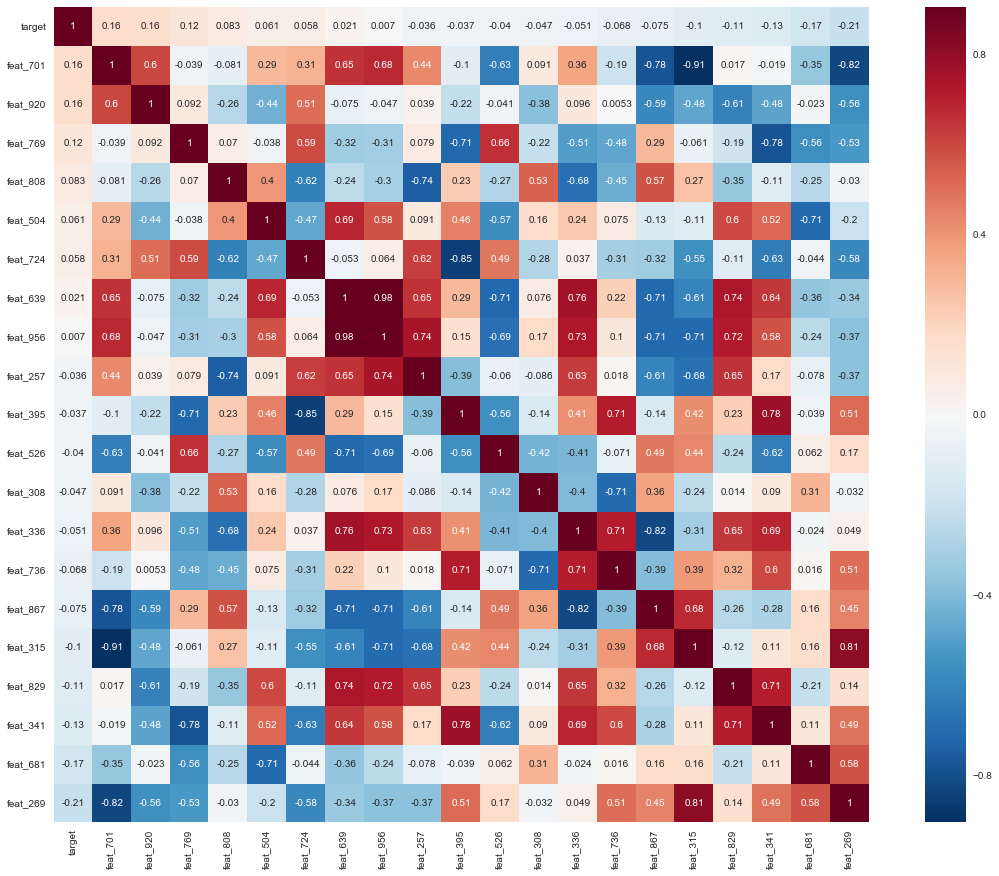

In [17]:
lf1.corr_heatmap()

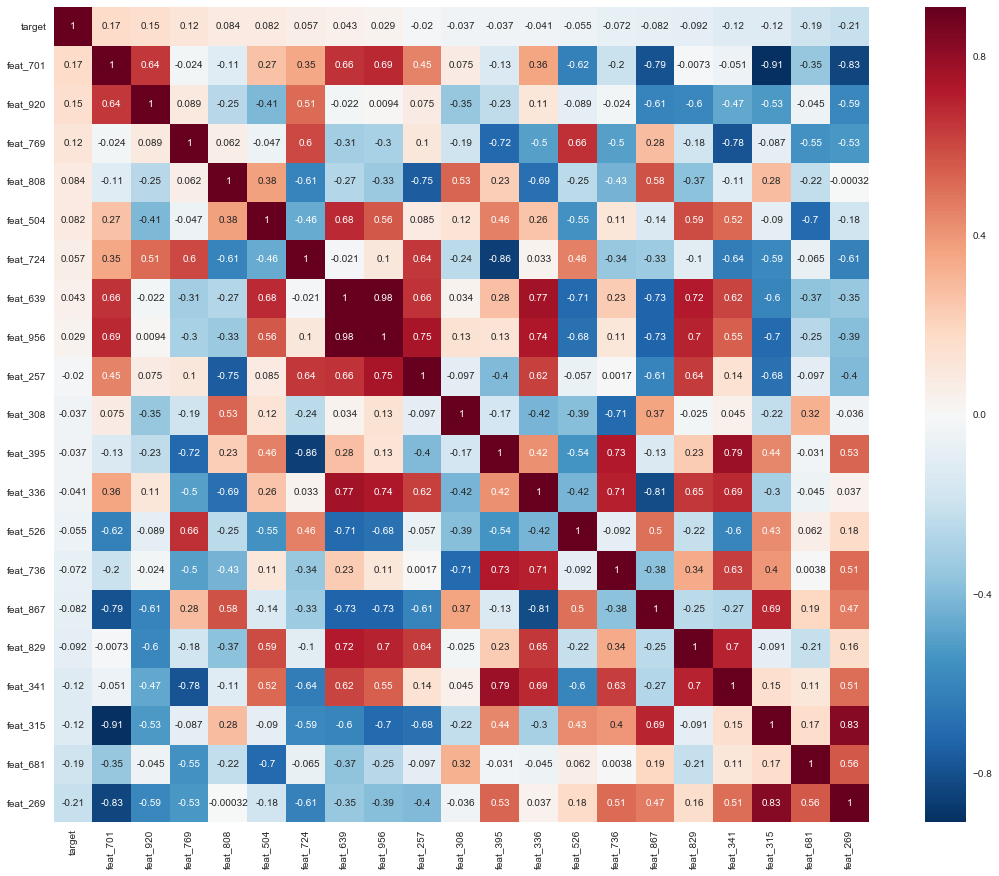

In [18]:
lf2.corr_heatmap()

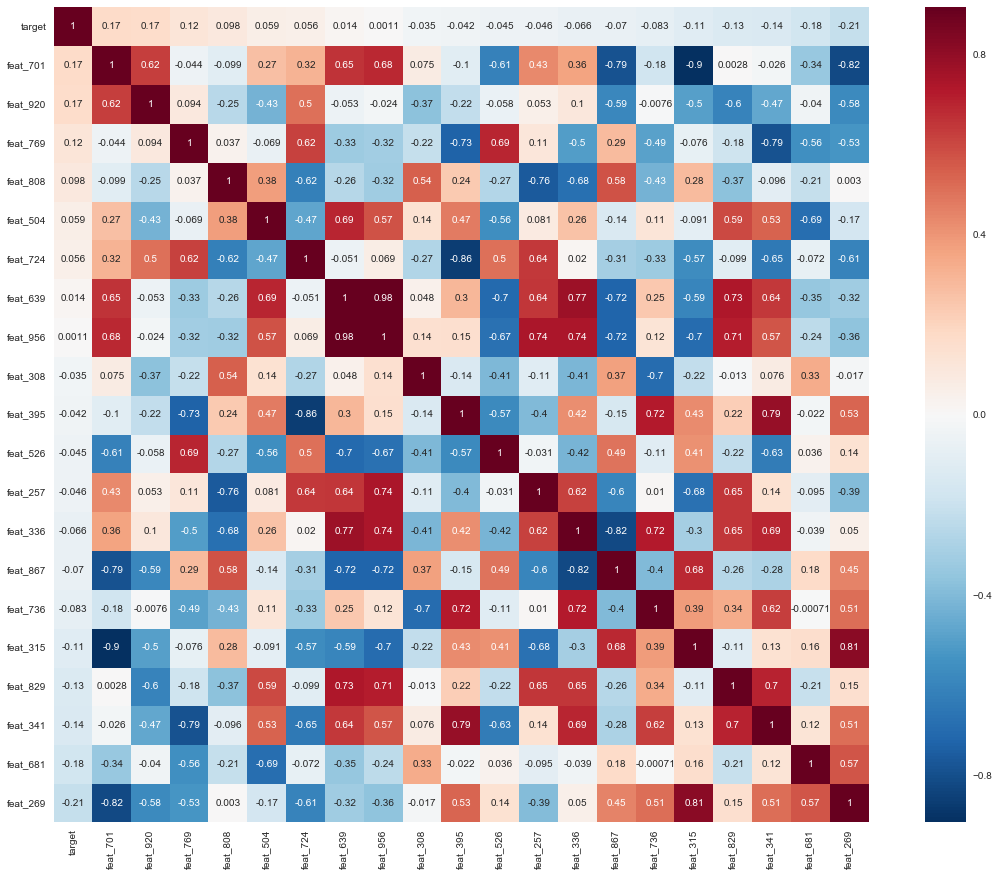

In [19]:
lf3.corr_heatmap()

In each of my samples, similar patterns of correlation between features are observed. This supports the conclusion that these 20 features comprise the informative and redundant features in the dataset. Slightly different correlations with the target are observed. Because the feature space has been reduced from 1000 to 20, all the data can now be investigated for these 20 features. The 3% samples represented 6.2E6 datapoints, whereas this final set of features is 4.2E6 datapoints.

# Select K Best

## Sample 1

In [7]:
from sklearn.features_selection import SelectKBest

In [15]:
skb1 = SelectKBest(k=20)

In [16]:
skb1.fit(X1, y1)

SelectKBest(k=20, score_func=<function f_classif at 0x7f683e648268>)

In [17]:
X1.columns[skb1.get_support()]

Index(['feat_269', 'feat_308', 'feat_315', 'feat_336', 'feat_341', 'feat_395',
       'feat_504', 'feat_526', 'feat_680', 'feat_681', 'feat_701', 'feat_724',
       'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867', 'feat_910',
       'feat_916', 'feat_920'],
      dtype='object')

In [18]:
for feature in X1.columns[skb1.get_support()]:
    print('{} in top_corrs: {}'.format(feature, feature in lf1.top_corrs))

feat_269 in top_corrs: True
feat_308 in top_corrs: True
feat_315 in top_corrs: True
feat_336 in top_corrs: True
feat_341 in top_corrs: True
feat_395 in top_corrs: True
feat_504 in top_corrs: True
feat_526 in top_corrs: True
feat_680 in top_corrs: False
feat_681 in top_corrs: True
feat_701 in top_corrs: True
feat_724 in top_corrs: True
feat_736 in top_corrs: True
feat_769 in top_corrs: True
feat_808 in top_corrs: True
feat_829 in top_corrs: True
feat_867 in top_corrs: True
feat_910 in top_corrs: False
feat_916 in top_corrs: False
feat_920 in top_corrs: True


## Sample 2

In [19]:
skb2 = SelectKBest(k=20)

In [20]:
skb2.fit(X2, y2)

SelectKBest(k=20, score_func=<function f_classif at 0x7f683e648268>)

In [21]:
X2.columns[skb2.get_support()]

Index(['feat_003', 'feat_269', 'feat_307', 'feat_315', 'feat_336', 'feat_341',
       'feat_504', 'feat_526', 'feat_578', 'feat_639', 'feat_681', 'feat_701',
       'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867',
       'feat_920', 'feat_988'],
      dtype='object')

In [22]:
for feature in X2.columns[skb2.get_support()]:
    print('{} in top_corrs: {}'.format(feature, feature in lf2.top_corrs))

feat_003 in top_corrs: False
feat_269 in top_corrs: True
feat_307 in top_corrs: False
feat_315 in top_corrs: True
feat_336 in top_corrs: True
feat_341 in top_corrs: True
feat_504 in top_corrs: True
feat_526 in top_corrs: True
feat_578 in top_corrs: False
feat_639 in top_corrs: True
feat_681 in top_corrs: True
feat_701 in top_corrs: True
feat_724 in top_corrs: True
feat_736 in top_corrs: True
feat_769 in top_corrs: True
feat_808 in top_corrs: True
feat_829 in top_corrs: True
feat_867 in top_corrs: True
feat_920 in top_corrs: True
feat_988 in top_corrs: False


## Sample 3

In [23]:
skb3 = SelectKBest(k=20)

In [24]:
skb3.fit(X3, y3)

SelectKBest(k=20, score_func=<function f_classif at 0x7f683e648268>)

In [25]:
X3.columns[skb3.get_support()]

Index(['feat_125', 'feat_257', 'feat_269', 'feat_315', 'feat_336', 'feat_341',
       'feat_348', 'feat_395', 'feat_457', 'feat_504', 'feat_526', 'feat_681',
       'feat_701', 'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829',
       'feat_867', 'feat_920'],
      dtype='object')

In [26]:
for feature in X3.columns[skb3.get_support()]:
    print('{} in top_corrs: {}'.format(feature, feature in lf3.top_corrs))

feat_125 in top_corrs: False
feat_257 in top_corrs: True
feat_269 in top_corrs: True
feat_315 in top_corrs: True
feat_336 in top_corrs: True
feat_341 in top_corrs: True
feat_348 in top_corrs: False
feat_395 in top_corrs: True
feat_457 in top_corrs: False
feat_504 in top_corrs: True
feat_526 in top_corrs: True
feat_681 in top_corrs: True
feat_701 in top_corrs: True
feat_724 in top_corrs: True
feat_736 in top_corrs: True
feat_769 in top_corrs: True
feat_808 in top_corrs: True
feat_829 in top_corrs: True
feat_867 in top_corrs: True
feat_920 in top_corrs: True


# Select from Model with DTC

In [27]:
from sklearn.feature_selection import SelectFromModel

In [29]:
scaler = StandardScaler()

# Sample 1

In [28]:
sfm1 = SelectFromModel(DecisionTreeClassifier())

In [31]:
X1_sc = scaler.fit_transform(X1)

In [33]:
sfm1.fit(X1_sc, y1)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
        prefit=False, threshold=None)

In [35]:
sum(sfm1.get_support())

284

In [37]:
X1.columns[sfm1.get_support()]

Index(['feat_004', 'feat_005', 'feat_009', 'feat_010', 'feat_011', 'feat_013',
       'feat_014', 'feat_018', 'feat_020', 'feat_026',
       ...
       'feat_962', 'feat_963', 'feat_964', 'feat_965', 'feat_976', 'feat_982',
       'feat_989', 'feat_995', 'feat_997', 'feat_998'],
      dtype='object', length=284)

In [39]:
for feature in X1.columns[sfm1.get_support()]:
    if feature in lf1.top_corrs:
        print(feature)

feat_257
feat_269
feat_308
feat_315
feat_341
feat_395
feat_526
feat_639
feat_681
feat_701
feat_724
feat_736
feat_769
feat_808
feat_829
feat_867
feat_920


# Sample 2

In [40]:
sfm2 = SelectFromModel(DecisionTreeClassifier())

In [41]:
X2_sc = scaler.fit_transform(X2)

In [42]:
sfm2.fit(X2_sc, y2)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
        prefit=False, threshold=None)

In [43]:
sum(sfm2.get_support())

271

In [44]:
X2.columns[sfm2.get_support()]

Index(['_id', 'feat_001', 'feat_009', 'feat_013', 'feat_017', 'feat_023',
       'feat_027', 'feat_031', 'feat_032', 'feat_034',
       ...
       'feat_960', 'feat_964', 'feat_965', 'feat_967', 'feat_968', 'feat_974',
       'feat_981', 'feat_984', 'feat_996', 'feat_997'],
      dtype='object', length=271)

In [45]:
for feature in X2.columns[sfm2.get_support()]:
    if feature in lf2.top_corrs:
        print(feature)

feat_257
feat_269
feat_308
feat_315
feat_341
feat_395
feat_504
feat_526
feat_639
feat_681
feat_701
feat_724
feat_736
feat_769
feat_808
feat_829
feat_867
feat_920
feat_956


# Sample 3

In [46]:
sfm3 = SelectFromModel(DecisionTreeClassifier())

In [47]:
X3_sc = scaler.fit_transform(X3)

In [48]:
sfm3.fit(X3_sc, y3)

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
        prefit=False, threshold=None)

In [49]:
sum(sfm3.get_support())

281

In [50]:
X3.columns[sfm3.get_support()]

Index(['feat_000', 'feat_001', 'feat_005', 'feat_009', 'feat_012', 'feat_013',
       'feat_015', 'feat_021', 'feat_022', 'feat_025',
       ...
       'feat_951', 'feat_956', 'feat_962', 'feat_964', 'feat_970', 'feat_980',
       'feat_985', 'feat_988', 'feat_993', 'feat_998'],
      dtype='object', length=281)

In [51]:
for feature in X3.columns[sfm3.get_support()]:
    if feature in lf3.top_corrs:
        print(feature)

feat_257
feat_269
feat_308
feat_315
feat_336
feat_341
feat_395
feat_504
feat_526
feat_639
feat_681
feat_724
feat_736
feat_769
feat_808
feat_829
feat_867
feat_920
feat_956
